In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat
import numpy as np
from scipy.stats import linregress

# <font color='blue'> Importing Files and Data

In [2]:
tn_budgets= pd.read_csv('data/tn.movie_budgets.csv.gz')
tn_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


# Data shapes

In [3]:
tn_budgets.shape

(5782, 6)

# Number of Unique titles

Compare to number of rows in data shapes

In [4]:
tn_budgets['movie'].nunique() #checking number of unique titles in df

5698

In [5]:
# movies['original_title'].nunique() #checking number of unique titles in df

# <font color='blue'>Looking @ IMDB SQL file

In [6]:
!ls Data #checking data in folder

bom.movie_gross.csv.gz  im.db.zip               tmdb.movies.csv.gz
im.db                   rt.movie_info.tsv.gz    tn.movie_budgets.csv.gz
im.db.gz                rt.reviews.tsv.gz


In [7]:
#create connection
con = sqlite3.connect('data/im.db')

# Table 1 - IMDB ratings


In [8]:
imdb_ratings = pd.read_sql(""" SELECT * FROM movie_ratings
""", con)
imdb_ratings.head(15)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [9]:
imdb_ratings.shape #looking at the shape

(73856, 3)

# Table 2 - IMDB Basics

In [10]:
#table 2
imdb_basics = pd.read_sql("""
SELECT *
FROM movie_basics

""", con)

imdb_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [11]:
imdb_basics.shape ##looking at the shape

(146144, 6)

# Table 3 - IMDB akas

In [12]:
#table 3
imdb_akas = pd.read_sql("""
SELECT *
FROM movie_akas

""", con)

imdb_akas.head(50)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
5,tt0369610,15,Jurassic World,GR,None,imdbDisplay,None,0.0
6,tt0369610,16,Jurassic World,IT,None,imdbDisplay,None,0.0
7,tt0369610,17,Jurski svijet,HR,None,imdbDisplay,None,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,None,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,None,imdbDisplay,None,0.0


In [13]:
imdb_akas.shape ##looking at the shape

(331703, 8)

# <font color='blue'>Merging IMDB SQL Tables together

**Selecting imdb_akas rows that are from region US and grouping by movie_id**

In [14]:
imdb_akas_us = pd.read_sql('''
SELECT *
FROM movie_akas
WHERE region = 'US'
GROUP BY movie_id
''', con)
imdb_akas_us.shape

(47433, 8)

taking imdb_basics

In [15]:
# m_basics = pd.read_sql('''
# SELECT *
# FROM movie_basics
# WHERE length(movie_id) = 9
# ''', con)
# m_basics.shape

**Inner merging idmb_ratings to modified idmb_akas table**

In [16]:
akas_basics_merge = imdb_akas_us.merge(imdb_basics, on='movie_id',
                                        how='inner')

**Left join IMDB ratings to imdb akas**

In [17]:
imdb_merged = akas_basics_merge.merge(imdb_ratings, on='movie_id',
                                       how='left')

#  <font color='blue'>Creating Joined Data Table for All</font>

## Cleaning up data frames to properly join!
- Removing unnecessary columns: language, types, attributes
- Cleaning up date columns for proper joins
- Removing duplicates

<font color='red'> SQL Data Table Cleanup </font>

In [18]:
#Removing language and types because mostly null values
#Removing attributes bc not a need column

imdb_merged.drop(labels =['language','types','attributes'] , axis = 1, inplace = True) 

In [19]:
imdb_merged.shape

(47433, 12)

In [20]:
imdb_merged.nunique()

movie_id             47433
ordering                43
title                45308
region                   1
is_original_title        2
primary_title        45341
original_title       45449
start_year              17
runtime_minutes        290
genres                 850
averagerating           90
numvotes              5325
dtype: int64

In [21]:
#Removing dublicates if they match in runtime minutes and primary title
#imdb_merged.drop_duplicates(subset = ['primary_title', 'runtime_minutes'], inplace= True)

In [22]:
#Checking duplicates 
imdb_merged.loc[imdb_merged['title'] == 'Aladdin']
##only one Aladdin appearing now! Yay! 

,movie_id,ordering,title,region,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
40613,tt6139732,13,Aladdin,US,0.0,Aladdin,Aladdin,2019,128.0,"Adventure,Comedy,Family",7.4,57549.0


<font color='red'> Movie Budgets Table Cleanup </font>

In [23]:
#renaming movie title for ease of joining
tn_budgets.rename(columns = {'movie': 'primary_title'}, inplace = True) 

In [24]:
tn_budgets.loc[tn_budgets['primary_title'] == 'Aladdin'] 
#see here that there are 2 aladdins but they are from 2 seperate years
#this will be an issue for when we merge if we dont merge by year + title match

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
80,81,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
2032,33,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"


- need to merge on 2 columns i.e. start year and title column bc dupe movies diff years. 
- Can be a list to merge

In [25]:
#Creating new coumn called year that is date.time
tn_budgets['Release_Date_Time'] = pd.to_datetime(tn_budgets['release_date'])
tn_budgets['start_year'] = tn_budgets['Release_Date_Time'].dt.year

In [26]:
##taking sql_df_US, tn_budgets, movies and creating one table
#full_movies_df = imdb_merged.merge(tn_budgets, left_on= ['primary_title', 'start_year'],right_on= ['primary_title', 'year'], how= 'inner')

full_movies_df = imdb_merged.merge(tn_budgets, on= ['primary_title','start_year'], how= 'inner')



In [27]:
# Checking shape
full_movies_df.shape

(1340, 18)

In [28]:
full_movies_df

,movie_id,ordering,title,region,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,Release_Date_Time
0,tt0249516,2,Foodfight!,US,0.0,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012","$45,000,000",$0,"$73,706",2012-12-31
1,tt0359950,25,The Secret Life of Walter Mitty,US,0.0,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013","$91,000,000","$58,236,838","$187,861,183",2013-12-25
2,tt0365907,20,A Walk Among the Tombstones,US,0.0,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014","$28,000,000","$26,017,685","$62,108,587",2014-09-19
3,tt0369610,21,Jurassic World 3D,US,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015","$215,000,000","$652,270,625","$1,648,854,864",2015-06-12
4,tt0376136,16,Hunter S. Thompson's The Rum Diary,US,0.0,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011","$45,000,000","$13,109,815","$21,544,732",2011-10-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,tt8155288,16,Happy Death Day 2U,US,0.0,Happy Death Day 2U,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019","$9,000,000","$28,051,045","$64,179,495",2019-02-13
1336,tt8266310,1,Blinded by the Light,US,0.0,Blinded by the Light,Blinded by the Light,2019,117.0,"Biography,Comedy,Drama",6.2,173.0,64,"Aug 14, 2019","$15,000,000",$0,$0,2019-08-14
1337,tt8364368,5,Crawl,US,0.0,Crawl,Crawl,2019,NaN,"Action,Horror,Thriller",NaN,NaN,16,"Jul 12, 2019","$17,000,000",$0,$0,2019-07-12
1338,tt8632862,6,Fahrenheit 11/9,US,0.0,Fahrenheit 11/9,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018","$5,000,000","$6,352,306","$6,653,715",2018-09-21


# Droping excess columns

In [29]:
full_movies_df.drop(labels =['title','original_title'] , axis = 1, inplace = True) 

# <font color='blue'> Adding profit margin to full_movies </font>

<font color='red'> First remove $ and , from budget and gross and then change dtype to float </font>

In [30]:
# Check columns dtype
full_movies_df['worldwide_gross'].dtype

dtype('O')

In [31]:
# removing $ and commas and then convert to float
full_movies_df['worldwide_gross'] = full_movies_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype(float)
full_movies_df['production_budget'] = full_movies_df['production_budget'].str.replace('$','').str.replace(',','').astype(float)
full_movies_df['domestic_gross'] = full_movies_df['domestic_gross'].str.replace('$','').str.replace(',','').astype(float)

<font color='red'>Make new Df where gross and budget has no zeroes

In [32]:
full_movies_profit_df = full_movies_df.loc[full_movies_df['production_budget']!= 0].loc[full_movies_df['worldwide_gross']!=0]
full_movies_profit_df

,movie_id,ordering,region,is_original_title,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,Release_Date_Time
0,tt0249516,2,US,0.0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,2012-12-31
1,tt0359950,25,US,0.0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,2013-12-25
2,tt0365907,20,US,0.0,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,2014-09-19
3,tt0369610,21,US,0.0,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2015-06-12
4,tt0376136,16,US,0.0,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",45000000.0,13109815.0,2.154473e+07,2011-10-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,tt7784604,9,US,0.0,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571.0,56,"Jun 8, 2018",10000000.0,44069456.0,7.013390e+07,2018-06-08
1334,tt7959026,23,US,0.0,The Mule,2018,116.0,"Crime,Drama,Thriller",7.1,58955.0,100,"Dec 14, 2018",50000000.0,103804407.0,1.708577e+08,2018-12-14
1335,tt8155288,16,US,0.0,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",9000000.0,28051045.0,6.417950e+07,2019-02-13
1338,tt8632862,6,US,0.0,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",5000000.0,6352306.0,6.653715e+06,2018-09-21


<font color='red'>Create profit column

In [33]:
full_movies_profit_df['profit'] = full_movies_profit_df['worldwide_gross'] - full_movies_profit_df['production_budget']


<font color='red'>Create profit_margin column

In [34]:
full_movies_profit_df['profit_margin'] = (full_movies_profit_df['profit'] / full_movies_profit_df['worldwide_gross']) * 100


In [35]:
full_movies_profit_df

,movie_id,ordering,region,is_original_title,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross,worldwide_gross,Release_Date_Time,profit,profit_margin
0,tt0249516,2,US,0.0,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012",45000000.0,0.0,7.370600e+04,2012-12-31,-4.492629e+07,-60953.374216
1,tt0359950,25,US,0.0,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300.0,37,"Dec 25, 2013",91000000.0,58236838.0,1.878612e+08,2013-12-25,9.686118e+07,51.559977
2,tt0365907,20,US,0.0,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116.0,67,"Sep 19, 2014",28000000.0,26017685.0,6.210859e+07,2014-09-19,3.410859e+07,54.917667
3,tt0369610,21,US,0.0,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,34,"Jun 12, 2015",215000000.0,652270625.0,1.648855e+09,2015-06-12,1.433855e+09,86.960647
4,tt0376136,16,US,0.0,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787.0,16,"Oct 28, 2011",45000000.0,13109815.0,2.154473e+07,2011-10-28,-2.345527e+07,-108.867764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,tt7784604,9,US,0.0,Hereditary,2018,127.0,"Drama,Horror,Mystery",7.3,151571.0,56,"Jun 8, 2018",10000000.0,44069456.0,7.013390e+07,2018-06-08,6.013390e+07,85.741561
1334,tt7959026,23,US,0.0,The Mule,2018,116.0,"Crime,Drama,Thriller",7.1,58955.0,100,"Dec 14, 2018",50000000.0,103804407.0,1.708577e+08,2018-12-14,1.208577e+08,70.735877
1335,tt8155288,16,US,0.0,Happy Death Day 2U,2019,100.0,"Drama,Horror,Mystery",6.3,27462.0,78,"Feb 13, 2019",9000000.0,28051045.0,6.417950e+07,2019-02-13,5.517950e+07,85.976830
1338,tt8632862,6,US,0.0,Fahrenheit 11/9,2018,128.0,Documentary,6.7,11628.0,29,"Sep 21, 2018",5000000.0,6352306.0,6.653715e+06,2018-09-21,1.653715e+06,24.854010


In [36]:
full_movies_profit_df.shape

(1239, 18)

In [37]:
full_movies_profit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1239 entries, 0 to 1339
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1239 non-null   object        
 1   ordering           1239 non-null   int64         
 2   region             1239 non-null   object        
 3   is_original_title  1239 non-null   float64       
 4   primary_title      1239 non-null   object        
 5   start_year         1239 non-null   int64         
 6   runtime_minutes    1236 non-null   float64       
 7   genres             1239 non-null   object        
 8   averagerating      1228 non-null   float64       
 9   numvotes           1228 non-null   float64       
 10  id                 1239 non-null   int64         
 11  release_date       1239 non-null   object        
 12  production_budget  1239 non-null   float64       
 13  domestic_gross     1239 non-null   float64       
 14  worldwid

In [38]:
# checking if our profit is accurate
#full_movies_profit_df.loc[full_movies_profit_df['title'] == 'Avatar']

# <font color='blue'> Making plots

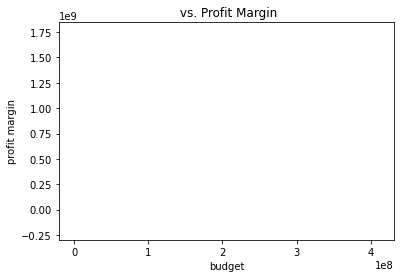

In [39]:
fig, ax = plt.subplots() 

x1 = full_movies_profit_df["production_budget"]
y1 = full_movies_profit_df["profit"]#.value_counts().sort_index().values



# x = full_movies_df["profit_margin"].value_counts().sort_index().index
# y = full_movies_df["profit_margin"].value_counts().sort_index().values
ax.bar(x1,y1)

ax.set_xlabel("budget")
ax.set_ylabel("profit margin")
ax.set_title(" vs. Profit Margin");

array([[1.        , 0.98373406],
       [0.98373406, 1.        ]])

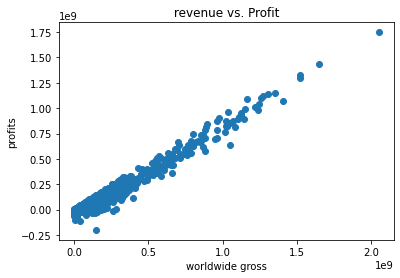

In [40]:
fig, ax = plt.subplots()

y=full_movies_profit_df["profit"]
x=full_movies_profit_df["worldwide_gross"]
# x = full_movies_profit_df["title_x"]
# y = full_movies_profit_df["profit_margin"]#.value_counts().sort_index().values

ax.scatter(x,y)

ax.set_xlabel("worldwide gross")
ax.set_ylabel("profits")
ax.set_title(" revenue vs. Profit ");
np.corrcoef(x,y)

array([[1.        , 0.77646419],
       [0.77646419, 1.        ]])

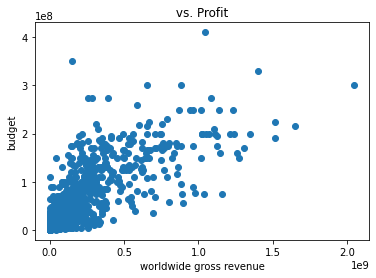

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stats
import numpy as np
fig, ax = plt.subplots()

x=full_movies_profit_df["worldwide_gross"]
y=full_movies_profit_df["production_budget"]
# x = full_movies_profit_df["title_x"]
# y = full_movies_profit_df["profit_margin"]#.value_counts().sort_index().values

ax.scatter(x,y)

ax.set_ylabel("budget")
ax.set_xlabel("worldwide gross revenue")
ax.set_title(" vs. Profit ");
np.corrcoef(x,y)

Slope: 3.2824945274004422
Intercept: -2006584.6944301128
Correlation: (r) 0.7764641907664722


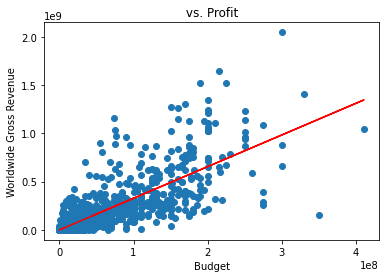

In [49]:
import numpy as np
from scipy.stats import linregress
# Calculate IQR and outliers
# q1 = np.percentile(full_movies_profit_df["profit_margin"],25)
# q3 = np.percentile(full_movies_profit_df["profit_margin"],75)
# iqr = q3 - q1
# lower = q1 - 1.5*iqr
# upper = q3 + 1.5*iqr
# outliers = (full_movies_profit_df['profit_margin'] < lower) | (full_movies_profit_df['profit_margin'] > upper)
# remove outliers
# x = full_movies_profit_df.loc[~outliers, 'profit_margin']
# y = full_movies_profit_df.loc[~outliers, 'profit']
x = full_movies_profit_df['production_budget']
y = full_movies_profit_df['worldwide_gross']
fig, ax = plt.subplots()


ax.scatter(x,y)

ax.set_ylabel("Worldwide Gross Revenue")
ax.set_xlabel("Budget")
ax.set_title(" vs. Profit ");
np.corrcoef(x,y)


slope, intercept, r, p, se = linregress(x,y)
res = linregress(x, y)
plt.plot(x, res.intercept + res.slope*x, 'r')

print('Slope:', slope)
print('Intercept:', intercept)
print('Correlation: (r)', r)


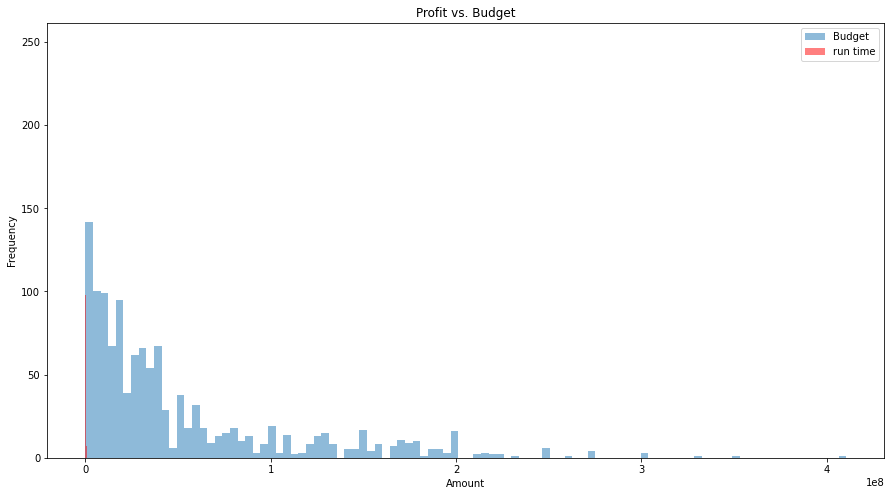

In [60]:

x = full_movies_profit_df['worldwide_gross']
y = full_movies_profit_df['production_budget']
z = full_movies_profit_df['numvotes']
plt.figure(figsize=(15, 8))

#plt.hist(x, bins=500, alpha=0.5, label='Revenue ',)
plt.hist(y, bins=100, alpha=0.5, label='Budget')
plt.hist(z, bins=100, alpha=0.5, label='run time',color='red')


plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Profit vs. Budget')

plt.legend(loc='upper right')
plt.show()

Slope: 0.1836702649494115
Intercept: 20705038.32701435
Correlation: (r) 0.7764641907664722


array([[1.        , 0.77646419],
       [0.77646419, 1.        ]])

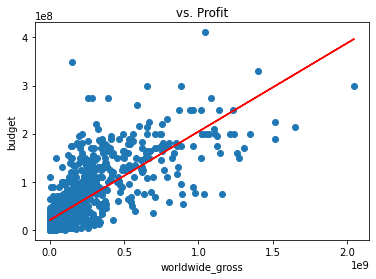

In [46]:
# Calculate IQR and outliers
# q1 = np.percentile(full_movies_profit_df["profit"],25)
# q3 = np.percentile(full_movies_profit_df["profit"],75)
# iqr = q3 - q1
# lower = q1 - 1.5*iqr
# upper = q3 + 1.5*iqr
# outliers = (full_movies_profit_df['profit'] < lower) | (full_movies_profit_df['profit'] > upper)
# # remove outliers
# x = full_movies_profit_df.loc[~outliers, 'profit']
# y = full_movies_profit_df.loc[~outliers, 'production_budget']


x = full_movies_profit_df['worldwide_gross']
y = full_movies_profit_df['production_budget']
fig, ax = plt.subplots()

ax.scatter(x,y)

ax.set_ylabel("budget")
ax.set_xlabel("worldwide_gross")
ax.set_title(" vs. Profit ");

slope, intercept, r, p, se = linregress(x,y)
res = linregress(x, y)
plt.plot(x, res.intercept + res.slope*x, 'r')


print('Slope:', slope)
print('Intercept:', intercept)
print('Correlation: (r)', r)
np.corrcoef(x,y)

In [47]:
correlation_matrix = full_movies_profit_df.corr()
print(correlation_matrix)

                   ordering  is_original_title  start_year  runtime_minutes  \
ordering           1.000000                NaN   -0.001195         0.146435   
is_original_title       NaN                NaN         NaN              NaN   
start_year        -0.001195                NaN    1.000000         0.106890   
runtime_minutes    0.146435                NaN    0.106890         1.000000   
averagerating      0.177737                NaN    0.033083         0.410213   
numvotes           0.267228                NaN   -0.124370         0.448051   
id                -0.019267                NaN    0.035384        -0.006591   
production_budget  0.242719                NaN    0.042904         0.372452   
domestic_gross     0.264459                NaN    0.071011         0.317383   
worldwide_gross    0.257312                NaN    0.078199         0.330463   
profit             0.240890                NaN    0.082005         0.292109   
profit_margin      0.056989                NaN   -0.